# Nasa Data Analysis

## Data Import and Treatment

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import datetime as dt

>~30 bad lines encountered during import. Negligible when compared to dataset size

In [41]:
df_import_jul=pd.read_csv(r"PATH", header=None, sep=" ", error_bad_lines=False)
df_import_aug=pd.read_csv(r"PATH", header=None, sep=" ", error_bad_lines=False)

b'Skipping line 132118: expected 8 fields, saw 9\nSkipping line 132154: expected 8 fields, saw 9\nSkipping line 132224: expected 8 fields, saw 9\n'
b'Skipping line 517923: expected 8 fields, saw 9\n'
b'Skipping line 840935: expected 8 fields, saw 9\n'
b'Skipping line 1008202: expected 8 fields, saw 9\n'
b'Skipping line 1051501: expected 8 fields, saw 9\nSkipping line 1105478: expected 8 fields, saw 9\n'
b'Skipping line 1295174: expected 8 fields, saw 9\n'
b'Skipping line 1356360: expected 8 fields, saw 9\n'
b'Skipping line 1511872: expected 8 fields, saw 9\nSkipping line 1511991: expected 8 fields, saw 9\nSkipping line 1545658: expected 8 fields, saw 11\n'
c:\users\****\anaconda3\envs\pythonproject1\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
b'Skipping line 34435: expected 8 fields, saw 11\n'
b'Skipping line 1

In [42]:
df_import_jul

,0,1,2,3,4,5,6,7
0,199.72.81.55,-,-,[01/Jul/1995:00:00:01,-0400],GET /history/apollo/ HTTP/1.0,200,6245
1,unicomp6.unicomp.net,-,-,[01/Jul/1995:00:00:06,-0400],GET /shuttle/countdown/ HTTP/1.0,200,3985
2,199.120.110.21,-,-,[01/Jul/1995:00:00:09,-0400],GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085
3,burger.letters.com,-,-,[01/Jul/1995:00:00:11,-0400],GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0
4,199.120.110.21,-,-,[01/Jul/1995:00:00:11,-0400],GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179
...,...,...,...,...,...,...,...,...
1891696,163.205.53.14,-,-,[28/Jul/1995:13:32:22,-0400],GET /shuttle/technology/images/srb_mod_compare...,200,28219
1891697,163.205.53.14,-,-,[28/Jul/1995:13:32:23,-0400],GET /images/KSC-logosmall.gif HTTP/1.0,200,1204
1891698,tiger2.ocs.lsu.edu,-,-,[28/Jul/1995:13:32:23,-0400],GET /shuttle/missions/missions.html HTTP/1.0,200,8677
1891699,199.0.2.27,-,-,[28/Jul/1995:13:32:23,-0400],GET /images/ksclogo-medium.gif HTTP/1.0,200,5866


In [43]:
df_import_aug

,0,1,2,3,4,5,6,7
0,in24.inetnebr.com,-,-,[01/Aug/1995:00:00:01,-0400],GET /shuttle/missions/sts-68/news/sts-68-mcc-0...,200,1839
1,uplherc.upl.com,-,-,[01/Aug/1995:00:00:07,-0400],GET / HTTP/1.0,304,0
2,uplherc.upl.com,-,-,[01/Aug/1995:00:00:08,-0400],GET /images/ksclogo-medium.gif HTTP/1.0,304,0
3,uplherc.upl.com,-,-,[01/Aug/1995:00:00:08,-0400],GET /images/MOSAIC-logosmall.gif HTTP/1.0,304,0
4,uplherc.upl.com,-,-,[01/Aug/1995:00:00:08,-0400],GET /images/USA-logosmall.gif HTTP/1.0,304,0
...,...,...,...,...,...,...,...,...
1569876,gatekeeper.uccu.com,-,-,[31/Aug/1995:23:59:49,-0400],GET /images/ksclogosmall.gif HTTP/1.0,304,0
1569877,gatekeeper.uccu.com,-,-,[31/Aug/1995:23:59:49,-0400],GET /images/lc39a-logo.gif HTTP/1.0,304,0
1569878,cys-cap-9.wyoming.com,-,-,[31/Aug/1995:23:59:52,-0400],GET /shuttle/missions/sts-71/movies/sts-71-lau...,200,57344
1569879,www-c8.proxy.aol.com,-,-,[31/Aug/1995:23:59:52,-0400],GET /icons/unknown.xbm HTTP/1.0,200,515


In [44]:
df_treated=df_import_jul.append(df_import_aug, ignore_index=True)
df_treated

,0,1,2,3,4,5,6,7
0,199.72.81.55,-,-,[01/Jul/1995:00:00:01,-0400],GET /history/apollo/ HTTP/1.0,200,6245
1,unicomp6.unicomp.net,-,-,[01/Jul/1995:00:00:06,-0400],GET /shuttle/countdown/ HTTP/1.0,200,3985
2,199.120.110.21,-,-,[01/Jul/1995:00:00:09,-0400],GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085
3,burger.letters.com,-,-,[01/Jul/1995:00:00:11,-0400],GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0
4,199.120.110.21,-,-,[01/Jul/1995:00:00:11,-0400],GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179
...,...,...,...,...,...,...,...,...
3461577,gatekeeper.uccu.com,-,-,[31/Aug/1995:23:59:49,-0400],GET /images/ksclogosmall.gif HTTP/1.0,304,0
3461578,gatekeeper.uccu.com,-,-,[31/Aug/1995:23:59:49,-0400],GET /images/lc39a-logo.gif HTTP/1.0,304,0
3461579,cys-cap-9.wyoming.com,-,-,[31/Aug/1995:23:59:52,-0400],GET /shuttle/missions/sts-71/movies/sts-71-lau...,200,57344
3461580,www-c8.proxy.aol.com,-,-,[31/Aug/1995:23:59:52,-0400],GET /icons/unknown.xbm HTTP/1.0,200,515


> Timezone is concatenated with timestamp

In [45]:
df_treated[3]=df_treated[3]+df_treated[4]
df_treated

,0,1,2,3,4,5,6,7
0,199.72.81.55,-,-,[01/Jul/1995:00:00:01-0400],-0400],GET /history/apollo/ HTTP/1.0,200,6245
1,unicomp6.unicomp.net,-,-,[01/Jul/1995:00:00:06-0400],-0400],GET /shuttle/countdown/ HTTP/1.0,200,3985
2,199.120.110.21,-,-,[01/Jul/1995:00:00:09-0400],-0400],GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085
3,burger.letters.com,-,-,[01/Jul/1995:00:00:11-0400],-0400],GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0
4,199.120.110.21,-,-,[01/Jul/1995:00:00:11-0400],-0400],GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179
...,...,...,...,...,...,...,...,...
3461577,gatekeeper.uccu.com,-,-,[31/Aug/1995:23:59:49-0400],-0400],GET /images/ksclogosmall.gif HTTP/1.0,304,0
3461578,gatekeeper.uccu.com,-,-,[31/Aug/1995:23:59:49-0400],-0400],GET /images/lc39a-logo.gif HTTP/1.0,304,0
3461579,cys-cap-9.wyoming.com,-,-,[31/Aug/1995:23:59:52-0400],-0400],GET /shuttle/missions/sts-71/movies/sts-71-lau...,200,57344
3461580,www-c8.proxy.aol.com,-,-,[31/Aug/1995:23:59:52-0400],-0400],GET /icons/unknown.xbm HTTP/1.0,200,515


In [46]:
df_treated.drop(columns=[1,2,4], inplace=True)
df_treated=df_treated.rename(columns={0:"ClientID/Hostname", 3:"Timestamp", 5:"Request", 6: "Response", 7:"Bytes"})
df_treated

,ClientID/Hostname,Timestamp,Request,Response,Bytes
0,199.72.81.55,[01/Jul/1995:00:00:01-0400],GET /history/apollo/ HTTP/1.0,200,6245
1,unicomp6.unicomp.net,[01/Jul/1995:00:00:06-0400],GET /shuttle/countdown/ HTTP/1.0,200,3985
2,199.120.110.21,[01/Jul/1995:00:00:09-0400],GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085
3,burger.letters.com,[01/Jul/1995:00:00:11-0400],GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0
4,199.120.110.21,[01/Jul/1995:00:00:11-0400],GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179
...,...,...,...,...,...
3461577,gatekeeper.uccu.com,[31/Aug/1995:23:59:49-0400],GET /images/ksclogosmall.gif HTTP/1.0,304,0
3461578,gatekeeper.uccu.com,[31/Aug/1995:23:59:49-0400],GET /images/lc39a-logo.gif HTTP/1.0,304,0
3461579,cys-cap-9.wyoming.com,[31/Aug/1995:23:59:52-0400],GET /shuttle/missions/sts-71/movies/sts-71-lau...,200,57344
3461580,www-c8.proxy.aol.com,[31/Aug/1995:23:59:52-0400],GET /icons/unknown.xbm HTTP/1.0,200,515


In [47]:
df_treated["Timestamp"]=df_treated["Timestamp"].str.replace("[","", regex=False)
df_treated["Timestamp"]=df_treated["Timestamp"].str.replace("]","",regex=False)
df_treated

,ClientID/Hostname,Timestamp,Request,Response,Bytes
0,199.72.81.55,01/Jul/1995:00:00:01-0400,GET /history/apollo/ HTTP/1.0,200,6245
1,unicomp6.unicomp.net,01/Jul/1995:00:00:06-0400,GET /shuttle/countdown/ HTTP/1.0,200,3985
2,199.120.110.21,01/Jul/1995:00:00:09-0400,GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085
3,burger.letters.com,01/Jul/1995:00:00:11-0400,GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0
4,199.120.110.21,01/Jul/1995:00:00:11-0400,GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179
...,...,...,...,...,...
3461577,gatekeeper.uccu.com,31/Aug/1995:23:59:49-0400,GET /images/ksclogosmall.gif HTTP/1.0,304,0
3461578,gatekeeper.uccu.com,31/Aug/1995:23:59:49-0400,GET /images/lc39a-logo.gif HTTP/1.0,304,0
3461579,cys-cap-9.wyoming.com,31/Aug/1995:23:59:52-0400,GET /shuttle/missions/sts-71/movies/sts-71-lau...,200,57344
3461580,www-c8.proxy.aol.com,31/Aug/1995:23:59:52-0400,GET /icons/unknown.xbm HTTP/1.0,200,515


In [48]:
df_treated.dtypes

ClientID/Hostname    object
Timestamp            object
Request              object
Response             object
Bytes                object
dtype: object

> Date column is created from Timestamp being split into two columns. The Time and Timestamp columns end up being dropped and the date column is converted into datetime datatype

In [49]:
df_treated[["Date","Time"]]=df_treated["Timestamp"].str.split(':',1, expand=True)
df_treated.drop(columns=["Timestamp","Time"], inplace=True)
df_treated["Date"]=pd.to_datetime(df_treated["Date"], format="%d/%b/%Y")
df_treated["Date"].dtype

dtype('<M8[ns]')

> A single row has an error code that looks erroneous and so is removed from the dataset

In [50]:
df_treated=df_treated[df_treated["Response"] !='HTTP/1.0"'].copy()
df_treated

,ClientID/Hostname,Request,Response,Bytes,Date
0,199.72.81.55,GET /history/apollo/ HTTP/1.0,200,6245,1995-07-01
1,unicomp6.unicomp.net,GET /shuttle/countdown/ HTTP/1.0,200,3985,1995-07-01
2,199.120.110.21,GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085,1995-07-01
3,burger.letters.com,GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0,1995-07-01
4,199.120.110.21,GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179,1995-07-01
...,...,...,...,...,...
3461577,gatekeeper.uccu.com,GET /images/ksclogosmall.gif HTTP/1.0,304,0,1995-08-31
3461578,gatekeeper.uccu.com,GET /images/lc39a-logo.gif HTTP/1.0,304,0,1995-08-31
3461579,cys-cap-9.wyoming.com,GET /shuttle/missions/sts-71/movies/sts-71-lau...,200,57344,1995-08-31
3461580,www-c8.proxy.aol.com,GET /icons/unknown.xbm HTTP/1.0,200,515,1995-08-31


> Response column has response codes replace with the response type and is converted to category data type to improve performance

In [51]:
df_treated["Response"]=df_treated["Response"].astype(np.int32)
df_treated["Response"]=df_treated["Response"].replace(to_replace={200:"OK", 304:"Not_Modified", 302:"Found", 404:"Not_Found", 403:"Forbidden", 500:"Internal_Server_Error", 501:"Not_Implemented", 400:"Bad_Request"})
df_treated["Response"]=df_treated["Response"].astype("category")
df_treated

,ClientID/Hostname,Request,Response,Bytes,Date
0,199.72.81.55,GET /history/apollo/ HTTP/1.0,OK,6245,1995-07-01
1,unicomp6.unicomp.net,GET /shuttle/countdown/ HTTP/1.0,OK,3985,1995-07-01
2,199.120.110.21,GET /shuttle/missions/sts-73/mission-sts-73.ht...,OK,4085,1995-07-01
3,burger.letters.com,GET /shuttle/countdown/liftoff.html HTTP/1.0,Not_Modified,0,1995-07-01
4,199.120.110.21,GET /shuttle/missions/sts-73/sts-73-patch-smal...,OK,4179,1995-07-01
...,...,...,...,...,...
3461577,gatekeeper.uccu.com,GET /images/ksclogosmall.gif HTTP/1.0,Not_Modified,0,1995-08-31
3461578,gatekeeper.uccu.com,GET /images/lc39a-logo.gif HTTP/1.0,Not_Modified,0,1995-08-31
3461579,cys-cap-9.wyoming.com,GET /shuttle/missions/sts-71/movies/sts-71-lau...,OK,57344,1995-08-31
3461580,www-c8.proxy.aol.com,GET /icons/unknown.xbm HTTP/1.0,OK,515,1995-08-31


> '-' in the bytes column is replaced with zero, the column is converted to int datatype and used to calculate Gigabytes column

In [52]:
df_treated["Bytes"].replace(to_replace={'-':0}, inplace=True)
df_treated["Bytes"]=df_treated["Bytes"].astype(np.int32, errors="raise")
df_treated["Gigabytes"]=df_treated["Bytes"]/(1024*1024*1024)
df_treated

,ClientID/Hostname,Request,Response,Bytes,Date,Gigabytes
0,199.72.81.55,GET /history/apollo/ HTTP/1.0,OK,6245,1995-07-01,5.816109e-06
1,unicomp6.unicomp.net,GET /shuttle/countdown/ HTTP/1.0,OK,3985,1995-07-01,3.711320e-06
2,199.120.110.21,GET /shuttle/missions/sts-73/mission-sts-73.ht...,OK,4085,1995-07-01,3.804453e-06
3,burger.letters.com,GET /shuttle/countdown/liftoff.html HTTP/1.0,Not_Modified,0,1995-07-01,0.000000e+00
4,199.120.110.21,GET /shuttle/missions/sts-73/sts-73-patch-smal...,OK,4179,1995-07-01,3.891997e-06
...,...,...,...,...,...,...
3461577,gatekeeper.uccu.com,GET /images/ksclogosmall.gif HTTP/1.0,Not_Modified,0,1995-08-31,0.000000e+00
3461578,gatekeeper.uccu.com,GET /images/lc39a-logo.gif HTTP/1.0,Not_Modified,0,1995-08-31,0.000000e+00
3461579,cys-cap-9.wyoming.com,GET /shuttle/missions/sts-71/movies/sts-71-lau...,OK,57344,1995-08-31,5.340576e-05
3461580,www-c8.proxy.aol.com,GET /icons/unknown.xbm HTTP/1.0,OK,515,1995-08-31,4.796311e-07


In [53]:
df_treated.dtypes

ClientID/Hostname            object
Request                      object
Response                   category
Bytes                         int32
Date                 datetime64[ns]
Gigabytes                   float64
dtype: object

In [54]:
df_finished=df_treated.copy()
df_finished

,ClientID/Hostname,Request,Response,Bytes,Date,Gigabytes
0,199.72.81.55,GET /history/apollo/ HTTP/1.0,OK,6245,1995-07-01,5.816109e-06
1,unicomp6.unicomp.net,GET /shuttle/countdown/ HTTP/1.0,OK,3985,1995-07-01,3.711320e-06
2,199.120.110.21,GET /shuttle/missions/sts-73/mission-sts-73.ht...,OK,4085,1995-07-01,3.804453e-06
3,burger.letters.com,GET /shuttle/countdown/liftoff.html HTTP/1.0,Not_Modified,0,1995-07-01,0.000000e+00
4,199.120.110.21,GET /shuttle/missions/sts-73/sts-73-patch-smal...,OK,4179,1995-07-01,3.891997e-06
...,...,...,...,...,...,...
3461577,gatekeeper.uccu.com,GET /images/ksclogosmall.gif HTTP/1.0,Not_Modified,0,1995-08-31,0.000000e+00
3461578,gatekeeper.uccu.com,GET /images/lc39a-logo.gif HTTP/1.0,Not_Modified,0,1995-08-31,0.000000e+00
3461579,cys-cap-9.wyoming.com,GET /shuttle/missions/sts-71/movies/sts-71-lau...,OK,57344,1995-08-31,5.340576e-05
3461580,www-c8.proxy.aol.com,GET /icons/unknown.xbm HTTP/1.0,OK,515,1995-08-31,4.796311e-07


---
## Data Analysis

### Data Usage

In [55]:
df_data=df_finished.groupby("Date")["Gigabytes"].sum()
df_data

Date
1995-07-01    1.506534
1995-07-02    1.426581
1995-07-03    1.942113
1995-07-04    1.624667
1995-07-05    1.910368
1995-07-06    2.066616
1995-07-07    1.818218
1995-07-08    0.864404
1995-07-09    0.702385
1995-07-10    1.282125
1995-07-11    1.292662
1995-07-12    1.597368
1995-07-13    2.453826
1995-07-14    1.790479
1995-07-15    0.909045
1995-07-16    0.969457
1995-07-17    1.334437
1995-07-18    1.096825
1995-07-19    1.266524
1995-07-20    1.123051
1995-07-21    1.053615
1995-07-22    0.621052
1995-07-23    0.713572
1995-07-24    1.129828
1995-07-25    1.069643
1995-07-26    0.969849
1995-07-27    1.047597
1995-07-28    0.455592
1995-08-01    0.492969
1995-08-03    0.682616
1995-08-04    1.033536
1995-08-05    0.571462
1995-08-06    0.590566
1995-08-07    0.892063
1995-08-08    0.990186
1995-08-09    0.913502
1995-08-10    0.963779
1995-08-11    1.026994
1995-08-12    0.647824
1995-08-13    0.648965
1995-08-14    1.009124
1995-08-15    0.982002
1995-08-16    0.926342
1995-0

(0.0, 2.5537374822888523)

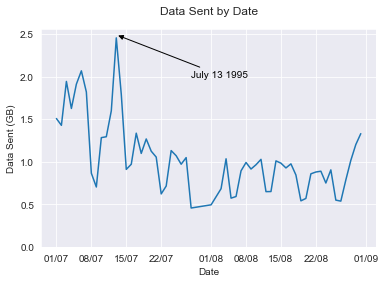

In [56]:
sns.set_style("darkgrid")
myFmt = mdates.DateFormatter('%d/%m')
ax=sns.lineplot(x=df_data.index, y=df_data.values)
ax.set_xticklabels=[df_data.index]
ax.set(ylabel="Data Sent (GB)")
ax.set(xlabel="Date")
ax.set_title("Data Sent by Date",  pad=15)
ax.xaxis.set_major_formatter(myFmt)
x0=mdates.date2num(dt.datetime(1995,7,13))
y0=2.49
plt.annotate(text='July 13 1995',xy=(x0,y0), color='k', arrowprops=dict(arrowstyle='-|>', color='k'), xytext=(x0+15,y0-0.5))
ax.set_ylim(ymin=0)
# plt.savefig("GBperDay.svg") 

### Request source

In [57]:
df_hosts=df_finished.copy()
host=df_hosts.groupby("ClientID/Hostname").size().nlargest(10)
host

ClientID/Hostname
piweba3y.prodigy.com    21987
piweba4y.prodigy.com    16435
piweba1y.prodigy.com    12825
edams.ksc.nasa.gov      11964
163.206.89.4             9697
news.ti.com              8161
www-d1.proxy.aol.com     8047
alyssa.prodigy.com       8037
siltb10.orl.mmc.com      7573
www-a2.proxy.aol.com     7516
dtype: int64

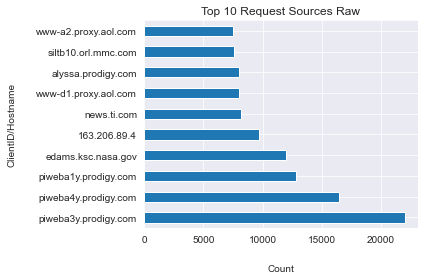

In [58]:
host.plot.barh()
plt.xlabel("Count", labelpad=20)
plt.ylabel("ClientID/Hostname", labelpad=20)
plt.title("Top 10 Request Sources Raw")
plt.tight_layout()
# plt.savefig("TopRequestSourceRaw.svg") 

In [59]:
df_hosts.loc[df_hosts['ClientID/Hostname'].str.contains('proxy.aol'), 'ClientID/Hostname'] = 'AOL'
df_hosts.loc[df_hosts['ClientID/Hostname'].str.contains('prodigy'), 'ClientID/Hostname'] = 'Prodigy'
df_hosts.loc[df_hosts['ClientID/Hostname'].str.contains('nasa.gov'), 'ClientID/Hostname'] = 'NASA'
df_hosts.loc[df_hosts['ClientID/Hostname'].str.contains('163.206.89.4'), 'ClientID/Hostname'] = 'NASA'
df_hosts.loc[df_hosts['ClientID/Hostname'].str.contains('lockheed'), 'ClientID/Hostname'] = 'Lockheed'
df_hosts.loc[df_hosts['ClientID/Hostname'].str.contains('ibm.com'), 'ClientID/Hostname'] = 'IBM'
df_hosts.loc[df_hosts['ClientID/Hostname'].str.contains('ibm.net'), 'ClientID/Hostname'] = 'IBM'
df_hosts.loc[df_hosts['ClientID/Hostname'].str.contains('boeing'), 'ClientID/Hostname'] = 'Boeing'
df_hosts.loc[df_hosts['ClientID/Hostname'].str.contains('mmc.com'), 'ClientID/Hostname'] = 'MMC'
df_hosts.loc[df_hosts['ClientID/Hostname'].str.contains('.mil'), 'ClientID/Hostname'] = 'Military'
df_hosts.loc[df_hosts['ClientID/Hostname'].str.contains('ti.com'), 'ClientID/Hostname'] = 'TI'
df_hosts.loc[df_hosts['ClientID/Hostname'].str.contains('mot.com'), 'ClientID/Hostname'] = 'Motorola'

In [60]:
host=df_hosts.groupby("ClientID/Hostname").size().nlargest(10)
host

ClientID/Hostname
NASA        233872
AOL         115712
Prodigy      71218
IBM          40344
Military     33948
MMC          22408
TI            9036
Lockheed      8120
Motorola      6896
Boeing        6770
dtype: int64

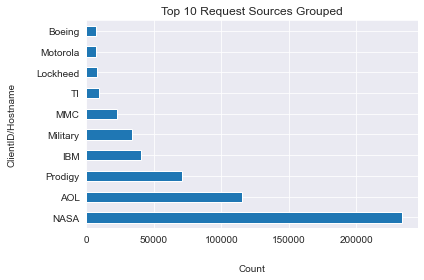

In [61]:
host.plot.barh()
plt.xlabel("Count", labelpad=20)
plt.ylabel("ClientID/Hostname", labelpad=20)
plt.title("Top 10 Request Sources Grouped")
plt.tight_layout()
# plt.savefig("TopRequestSource.svg") 

### Error Analysis

> Filter successful requests out and then slice out empty categories

In [62]:
df_response=df_finished.copy()
df_error=df_response[(df_response["Response"] != "OK") & (df_response["Response"]!="Not_Modified")  & (df_response["Response"]!="Found")]
error=df_error["Response"].value_counts()[:5]
error

Not_Found                20872
Forbidden                  224
Internal_Server_Error       65
Not_Implemented             41
Bad_Request                 15
Name: Response, dtype: int64

> Slice series to exclude Not_Found

In [63]:
error_NNF=error[1:]
error_NNF

Forbidden                224
Internal_Server_Error     65
Not_Implemented           41
Bad_Request               15
Name: Response, dtype: int64

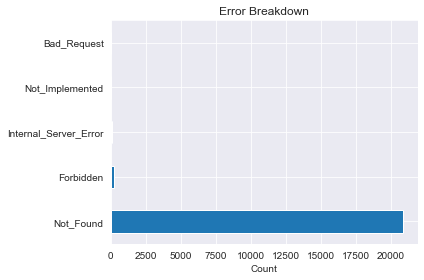

In [64]:
error.plot.barh()
plt.xlabel("Count")
plt.title("Error Breakdown")
plt.tight_layout()
# plt.savefig("ErrorBreakdown.svg")

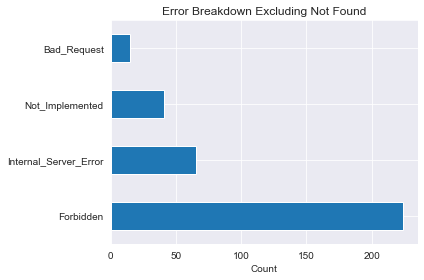

In [65]:
error_NNF.plot.barh()
plt.xlabel("Count")
plt.title("Error Breakdown Excluding Not Found")
plt.tight_layout()
# plt.savefig("ErrorBreakdownNNF.svg") 

### % Successful requests

In [66]:
round((len(df_error)/len(df_finished))*100,2)

0.61